In [2]:
from Regression import Regression
from Franke import FrankeCentered, FrankeCenteredNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams['figure.figsize'] = [6.0, 6.0]

np.random.seed(1942)

In [3]:
x, y = np.linspace(-0.5, 0.5, 201), np.linspace(-0.5, 0.5, 201)
reg = Regression()
reg.generate_generic_data(x, y, FrankeCenteredNoise)

100%|██████████| 30/30 [04:25<00:00,  8.85s/it]


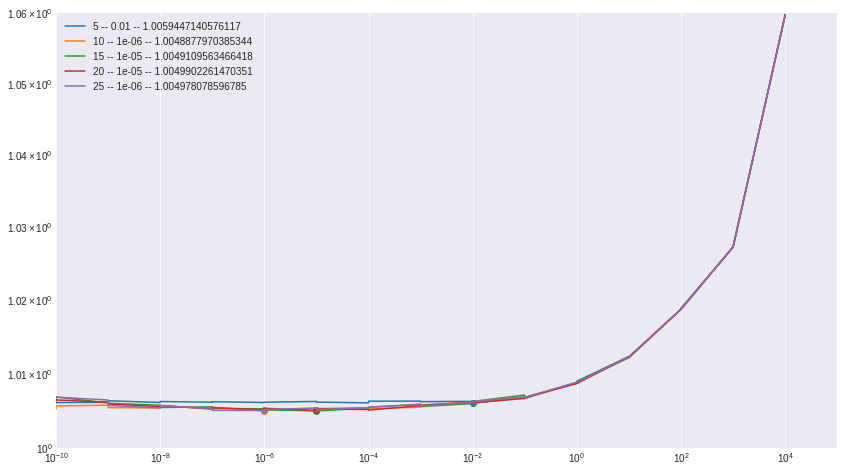

In [28]:
plt.figure(figsize=(14,8))
plt.xlim(10**-10, 10**5)
plt.ylim(1, 1.06)
for poly_order in [5, 10, 15, 20, 25]:
    error_list = np.zeros(30)
    lamda_list = np.zeros(30)

    for i in trange(30):
        lamda = 10**(-10 + i//2)
        data_pred = reg.solveKFold(K=10, poly_order=poly_order, solver="Ridge", lamda=lamda)
        error_list[i] = MSE(data_pred, reg.f)
        lamda_list[i] = lamda
        
    min_lamda = lamda_list[np.argmin(error_list)]
    min_error = np.min(error_list)
    plt.loglog(lamda_list, error_list, label=f"{poly_order} -- {min_lamda} -- {min_error}")
    plt.scatter(min_lamda, min_error)
plt.legend();

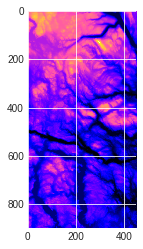

In [5]:
terrain1 = imread("../input_data/SRTM_data_Norway_1.tif")[::4, ::4]
plt.imshow(terrain1);
reg = Regression()
reg.load_matrix_data(terrain1)

In [7]:
plt.figure(figsize=(14,8))
error_list = np.zeros(30)
lamda_list = np.zeros(30)

for i in trange(30):
    lamda = 10**(-10 + i//2)
    data_pred = reg.solveKFold(K=10, poly_order=20, solver="Ridge", lamda=lamda)
    error_list[i] = MSE(data_pred, reg.f)
    lamda_list[i] = lamda

min_lamda = lamda_list[np.argmin(error_list)]
min_error = np.min(error_list)
plt.loglog(lamda_list, error_list, label=f"{poly_order} -- {min_lamda} -- {min_error}")
plt.scatter(min_lamda, min_error)
plt.legend();

100%|██████████| 30/30 [25:27<00:00, 50.67s/it]


NameError: name 'poly_order' is not defined

<Figure size 1008x576 with 0 Axes>

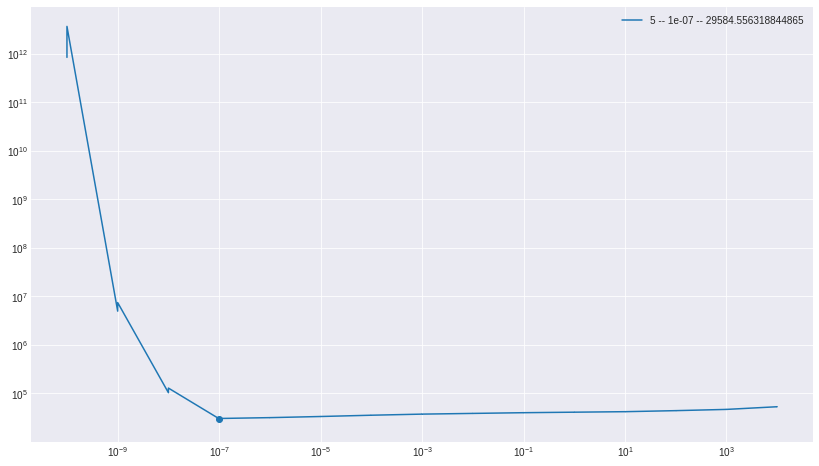

In [9]:
plt.figure(figsize=(14,8))
min_lamda = lamda_list[np.argmin(error_list)]
min_error = np.min(error_list)
plt.loglog(lamda_list, error_list, label=f"{5} -- {min_lamda} -- {min_error}")
plt.scatter(min_lamda, min_error)
plt.legend();